In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
#1. also look at when AG recieved data was entered --> missing info 
#2. sept 2017 is when the late reporting law went into effect, so looking at before/after the law change 
#3. what are the changes you see in each county before/after law change + over time
#4. bucket smaller counties by population, any county less than 100k, miss reporting x % of the time 
#5. break it up after top ten, like big, small, medium counties 
#6. can also look at the good reporters, can see what counties are consistently filing well and compare resources
#7. distribution of reporting times across everyone, see the skewness, look at median of that and see who's greater than 50% 
#8. see when they file, either really close to the due date or afterwards 
#9. rural vs. city reporting
#10. 

In [3]:
#TO DO:
#link to data.world 

In [4]:
#############################
#path where data is located
data_dir = '/Users/athulapudhiyidath/Dropbox/TJI/tji_date_reports/data'

#change to that path 
os.chdir(data_dir)

# Reading in and restructuring data about civilian-related incidents

In [5]:
#############################
#read in the civillians_shot.csv
civ_shot = pd.read_csv("tji_civiliansShot.csv") 

#look at data
civ_shot

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,incident_result_of,incident_call_other,civilian_name_first,civilian_name_last,...,num_officers_recorded,num_reports_filed,num_rows_about_this_incident,officer_age_11,officer_gender_11,officer_on_duty,officer_race_11,time_incident,weapon_reported_by_media,weapon_reported_by_media_category
0,NaN,2015-09-02,1010 MAGNOLIA STREET,FREEPORT,BRAZORIA,77541.0,TRAFFIC STOP,NARCOTIC STOP AND EVADING ARREST,RICKEY,MAYBERRY,...,1,1,1,NaN,NaN,True,NaN,NaN,NaN,NaN
1,NaN,2015-09-03,4840 E. PLANO PARKWAY,PLANO,COLLIN,75074.0,OTHER - SPECIFY TYPE OF CALL,ACCIDENTAL DISCHARGE RICOCHET DURING RANGE ACT...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,NaN,NaN,(DETAILS MISSING)
2,NaN,2015-09-04,101 COUCH CT.,SPRINGTOWN,PARKER,76082.0,OTHER - SPECIFY TYPE OF CALL,INVESTIGATION OF CRIMINAL ACTIVITY,SULLY JOE,LANIER,...,2,1,1,NaN,NaN,True,NaN,NaN,FIREARM,FIREARM
3,NaN,2015-09-05,4926 CHENNAULT ROAD,HOUSTON,HARRIS,77033.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,NaN,FIREARM,FIREARM
4,NaN,2015-09-08,1500 RANGE ROAD,"DFW, AIRPORT",TARRANT,75261.0,OTHER - SPECIFY TYPE OF CALL,TRAINING EXERCISE - RICOCHET FRAGMENTS RESULTI...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2020-02-25,2020-02-19,1000 CIRCLE LANE,BEDFORD,TARRANT,76022.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE; TRAF...,ASSIST IN LOCATING VEHICLE WHICH FLED FROM ANO...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,02:07:00,NaN,NaN
787,2020-02-25,2020-02-22,1117 MESA VERDE DR,MISSOURI CITY,FORT BEND,77489.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,AUSTIN,WILSON,...,1,1,1,NaN,NaN,True,NaN,18:43:00,GUN,FIREARM
788,2020-03-02,2020-02-22,806 AVENUE C,LEVELLAND,HOCKLEY,79336.0,EXECUTION OF A WARRANT,NaN,SAMUEL GARCIA,GARZEZ,...,1,1,1,NaN,NaN,True,NaN,06:17:00,GUN,FIREARM
789,2020-03-04,2020-02-24,305 10TH ST.,FLORESVILLE,WILSON,78114.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,STEPHEN MICHAEL,O'BRIEN,...,1,1,1,NaN,NaN,True,NaN,00:29:00,NaN,NaN


In [6]:
#The columns relevant for analyzing the data are the following:
civ_shot_date = civ_shot['date_incident']
civ_file_date = civ_shot['date_ag_received']

#remove the data that have NaN values in the colums above:
civ_shot_notnan = civ_shot[civ_shot['date_incident'].notna()]
civ_shot_notnan = civ_shot[civ_shot['date_ag_received'].notna()]

#now to reindex the non-NaN data:
civ_shot_notnan = civ_shot_notnan.reset_index(drop=True)

#look at non-NaN civilian data:
civ_shot_notnan

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,incident_result_of,incident_call_other,civilian_name_first,civilian_name_last,...,num_officers_recorded,num_reports_filed,num_rows_about_this_incident,officer_age_11,officer_gender_11,officer_on_duty,officer_race_11,time_incident,weapon_reported_by_media,weapon_reported_by_media_category
0,2017-02-07,2015-11-17,1655 BLUE BELL ROAD,HOUSTON,HARRIS,77038.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,JERAY DILRICHARD,CHATHAM,...,1,1,1,NaN,NaN,True,NaN,18:55:00,KNIFE,KNIFE/CUTTING
1,2017-02-08,2016-03-05,655 S. 23RD,BEAUMONT,JEFFERSON,77707.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,HERBERT EDGAR,BALLANCE,...,1,1,1,NaN,NaN,True,NaN,16:49:00,NaN,(DETAILS MISSING)
2,2017-02-23,2016-04-16,NaN,VICTORIA,VICTORIA,78904.0,OTHER - SPECIFY TYPE OF CALL,DECEDENT BROKE INTO THE OFFICERS RESIDENCE.,WADE AUSTIN,KLOESEL,...,1,1,1,NaN,NaN,False,NaN,03:26:00,NaN,NaN
3,2017-02-23,2016-07-07,801 MAIN ST.,DALLAS,DALLAS,75215.0,OTHER - SPECIFY TYPE OF CALL,AMBUSH OF OFFICERS BY SUSPECT. WOUNDED ON 7/7/...,MICAH XAVIER,JOHNSON,...,10,10,1,NaN,NaN,True,NaN,21:00:00,NaN,(DETAILS MISSING)
4,2017-02-09,2016-07-15,6155 W. UNIVERSITY,ODESSA,ECTOR,79763.0,OTHER - SPECIFY TYPE OF CALL,DEPUTIES WERE IN PURSUIT OF A STOLEN VEHICLE O...,GEORGE,ALFARO,...,1,1,1,NaN,NaN,True,NaN,11:40:00,PISTOL,FIREARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2020-02-25,2020-02-19,1000 CIRCLE LANE,BEDFORD,TARRANT,76022.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE; TRAF...,ASSIST IN LOCATING VEHICLE WHICH FLED FROM ANO...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,02:07:00,NaN,NaN
556,2020-02-25,2020-02-22,1117 MESA VERDE DR,MISSOURI CITY,FORT BEND,77489.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,AUSTIN,WILSON,...,1,1,1,NaN,NaN,True,NaN,18:43:00,GUN,FIREARM
557,2020-03-02,2020-02-22,806 AVENUE C,LEVELLAND,HOCKLEY,79336.0,EXECUTION OF A WARRANT,NaN,SAMUEL GARCIA,GARZEZ,...,1,1,1,NaN,NaN,True,NaN,06:17:00,GUN,FIREARM
558,2020-03-04,2020-02-24,305 10TH ST.,FLORESVILLE,WILSON,78114.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,STEPHEN MICHAEL,O'BRIEN,...,1,1,1,NaN,NaN,True,NaN,00:29:00,NaN,NaN


# Reading in and restructuring data about officer-related incidents

In [7]:
#############################
#read in the officrs_shot.csv
off_shot = pd.read_csv("tji_officersShot.csv") 

#look at data
off_shot

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,officer_harm,officer_name_first,officer_name_last,officer_age,...,civilian_race_2,civilian_gender_2,civilian_name_first_3,civilian_name_last_3,civilian_age_3,civilian_race_3,civilian_gender_3,media_link_1,media_link_2,media_link_3
0,NaN,2015-10-06 00:00:00,815 LAMAR DRIVE,SEGUIN,GUADALUPE,78155,INJURY,NaN,NaN,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-10-30 00:00:00,8000 MIDCROWN,SAN ANTONIO,BEXAR,78218,INJURY,JOSEPH,CANALES,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MYSA,NEWS4SANANTONIO,NaN
2,2017-02-21 00:00:00,2015-11-01 00:00:00,301 W. AVENUE B,TEMPLE,BELL,76501,DEATH,DARRELL,ALLEN,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WACO TRIBUNE-HERALD,NaN,NaN
3,NaN,2015-12-23 00:00:00,1025 CUSTER AVE.,ODESSA,ECTOR,79761,INJURY,PETE,GONZALES,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN
4,NaN,2015-12-23 00:00:00,1025 CUSTER AVE.,ODESSA,ECTOR,79761,INJURY,CORY,WESTER,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2020-01-09 00:00:00,2019-12-07 17:45:00,7400 AVE L,HOUSTON,HARRIS,77011,DEATH,CHRISTOPHER,BREWSTER,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABC 13,HOUSTON CHRONICLE,KHOU
133,2020-01-08 00:00:00,2019-12-11 16:22:00,6500 BLOCK OF TURNER FIELDS LN,LEAGUE CITY,GALVESTON,77573,INJURY,PATRICK,BRADSHAW,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HOUSTON CHRONICLE,KHOU,GALVESTON DAILY NEWS
134,2020-01-09 00:00:00,2019-12-31 01:56:00,FARM TO MARKET 10,GARY,PANOLA,75643,DEATH,CHRIS,DICKERSON,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KSLA,KLTV,LONGVIEW NEWS-JOURNAL
135,2020-02-21 00:00:00,2020-01-15 02:27:00,6600 FOREST HILL DRIVE,FOREST HILL,TARRANT,76140,INJURY,NAQIRRA,WILLIAMS,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WBAP,WFAA


In [8]:
#The columns relevant for analyzing the data are the following:
off_shot_date = off_shot['date_incident']
off_file_date = off_shot['date_ag_received']

#remove the data that have NaN values in the colums above:
off_shot_notnan = off_shot[off_shot['date_incident'].notna()]
off_shot_notnan = off_shot[off_shot['date_ag_received'].notna()]

#now to reindex the the non-NaN data:
off_shot_notnan = off_shot_notnan.reset_index(drop=True)

## Total number of civillian incident reports

In [9]:
print(len(civ_shot))

791


## Total number of civillian incident reports with incident date + Attorney General recieved date:

In [10]:
print(len(civ_shot_notnan))

560


## Total number of officer incident reports

In [11]:
print(len(off_shot))

137


## Total number of civillian incident reports with incident date + Attorney General recieved date:

In [12]:
print(len(off_shot_notnan))

120


In [13]:
def days_between(d1, d2, data_type):
    if pd.isna(d1) == True or pd.isna(d2) == True:
        return math.nan
    else:
        if data_type == 'civ':
            d1 = datetime.strptime(d1, "%Y-%m-%d").date()
            d2 = datetime.strptime(d2, "%Y-%m-%d").date()        
        elif data_type == 'off':
            d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S").date()
            d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S").date()   
        days_between = abs((d2 - d1).days)
        return int(days_between)

In [14]:
def year_incident(date, data_type):
    if pd.isna(date) == True:
        return math.nan
    else:
        if data_type == 'civ':
            this_year = datetime.strptime(date, "%Y-%m-%d").year
        elif data_type == 'off':
            this_year = datetime.strptime(date, "%Y-%m-%d %H:%M:%S").year
        return int(this_year)

In [15]:
civ_date_count = []
for n in range(len(civ_shot)):
    this_civ_shot_date = civ_shot['date_incident'][n]
    this_civ_file_date = civ_shot['date_ag_received'][n]
    days = days_between(this_civ_file_date, this_civ_shot_date, 'civ')
    civ_date_count.append(days)
civ_shot.insert(2, "date_count", civ_date_count, True)     

print(civ_shot)

    date_ag_received date_incident  date_count       incident_address  \
0                NaN    2015-09-02         NaN   1010 MAGNOLIA STREET   
1                NaN    2015-09-03         NaN  4840 E. PLANO PARKWAY   
2                NaN    2015-09-04         NaN          101 COUCH CT.   
3                NaN    2015-09-05         NaN    4926 CHENNAULT ROAD   
4                NaN    2015-09-08         NaN        1500 RANGE ROAD   
..               ...           ...         ...                    ...   
786       2020-02-25    2020-02-19         6.0       1000 CIRCLE LANE   
787       2020-02-25    2020-02-22         3.0     1117 MESA VERDE DR   
788       2020-03-02    2020-02-22         9.0           806 AVENUE C   
789       2020-03-04    2020-02-24         9.0           305 10TH ST.   
790       2020-03-03    2020-03-01         2.0     14406 MAISEMORE RD   

     incident_city incident_county  incident_zip  \
0         FREEPORT        BRAZORIA       77541.0   
1            PLANO 

In [16]:
civ_file_year = []
for n in range(len(civ_shot)):
    this_civ_file_date = civ_shot['date_ag_received'][n]
    file_year = year_incident(this_civ_file_date, 'civ')
    civ_file_year.append(file_year)
civ_shot.insert(2, "year_file", civ_file_year, True)     

print(civ_shot)

    date_ag_received date_incident  year_file  date_count  \
0                NaN    2015-09-02        NaN         NaN   
1                NaN    2015-09-03        NaN         NaN   
2                NaN    2015-09-04        NaN         NaN   
3                NaN    2015-09-05        NaN         NaN   
4                NaN    2015-09-08        NaN         NaN   
..               ...           ...        ...         ...   
786       2020-02-25    2020-02-19     2020.0         6.0   
787       2020-02-25    2020-02-22     2020.0         3.0   
788       2020-03-02    2020-02-22     2020.0         9.0   
789       2020-03-04    2020-02-24     2020.0         9.0   
790       2020-03-03    2020-03-01     2020.0         2.0   

          incident_address  incident_city incident_county  incident_zip  \
0     1010 MAGNOLIA STREET       FREEPORT        BRAZORIA       77541.0   
1    4840 E. PLANO PARKWAY          PLANO          COLLIN       75074.0   
2            101 COUCH CT.     SPRINGTOWN 

In [17]:
off_date_count = []
for n in range(len(off_shot)):
    this_off_shot_date = off_shot['date_incident'][n]
    this_off_file_date = off_shot['date_ag_received'][n]
    days = days_between(this_off_file_date, this_off_shot_date, 'off')
    off_date_count.append(days)
off_shot.insert(2, "date_count", off_date_count, True)     

print(off_shot)

        date_ag_received        date_incident  date_count  \
0                    NaN  2015-10-06 00:00:00         NaN   
1                    NaN  2015-10-30 00:00:00         NaN   
2    2017-02-21 00:00:00  2015-11-01 00:00:00       478.0   
3                    NaN  2015-12-23 00:00:00         NaN   
4                    NaN  2015-12-23 00:00:00         NaN   
..                   ...                  ...         ...   
132  2020-01-09 00:00:00  2019-12-07 17:45:00        33.0   
133  2020-01-08 00:00:00  2019-12-11 16:22:00        28.0   
134  2020-01-09 00:00:00  2019-12-31 01:56:00         9.0   
135  2020-02-21 00:00:00  2020-01-15 02:27:00        37.0   
136  2020-03-03 00:00:00  2020-01-24 19:53:00        39.0   

                   incident_address incident_city incident_county  \
0                   815 LAMAR DRIVE        SEGUIN       GUADALUPE   
1                     8000 MIDCROWN   SAN ANTONIO           BEXAR   
2                   301 W. AVENUE B        TEMPLE           

In [18]:
off_file_year = []
for n in range(len(off_shot)):
    this_off_file_date = off_shot['date_ag_received'][n]
    file_year = year_incident(this_off_file_date, 'off')
    off_file_year.append(file_year)
off_shot.insert(2, "year_file", off_file_year, True)     

print(off_shot)

        date_ag_received        date_incident  year_file  date_count  \
0                    NaN  2015-10-06 00:00:00        NaN         NaN   
1                    NaN  2015-10-30 00:00:00        NaN         NaN   
2    2017-02-21 00:00:00  2015-11-01 00:00:00     2017.0       478.0   
3                    NaN  2015-12-23 00:00:00        NaN         NaN   
4                    NaN  2015-12-23 00:00:00        NaN         NaN   
..                   ...                  ...        ...         ...   
132  2020-01-09 00:00:00  2019-12-07 17:45:00     2020.0        33.0   
133  2020-01-08 00:00:00  2019-12-11 16:22:00     2020.0        28.0   
134  2020-01-09 00:00:00  2019-12-31 01:56:00     2020.0         9.0   
135  2020-02-21 00:00:00  2020-01-15 02:27:00     2020.0        37.0   
136  2020-03-03 00:00:00  2020-01-24 19:53:00     2020.0        39.0   

                   incident_address incident_city incident_county  \
0                   815 LAMAR DRIVE        SEGUIN       GUADALUPE 

## Total number of civillian incident reports before 2017

In [19]:
# T B D

## Total number of civillian incident reports after 2017

In [20]:
# T B D 

# ==============================================================
# Dates between incident and report for civillians 
# ==============================================================

#### Creating a function to figure out the days between incident and reporting for civilian incidents:

In [21]:
def civ_days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

#### Looping through data to figure out the days between reporting of each incident:

In [22]:
civ_date_count = []
for n in range(len(civ_shot_notnan)):
    this_civ_shot_date = civ_shot_notnan['date_incident'][n]
    this_civ_file_date = civ_shot_notnan['date_ag_received'][n]
    days = civ_days_between(this_civ_file_date, this_civ_shot_date)
    civ_date_count.append(days)
    
civ_shot_notnan.insert(2, "date_count", civ_date_count, True)     

print(civ_shot_notnan)

    date_ag_received date_incident  date_count     incident_address  \
0         2017-02-07    2015-11-17         448  1655 BLUE BELL ROAD   
1         2017-02-08    2016-03-05         340          655 S. 23RD   
2         2017-02-23    2016-04-16         313                  NaN   
3         2017-02-23    2016-07-07         231         801 MAIN ST.   
4         2017-02-09    2016-07-15         209   6155 W. UNIVERSITY   
..               ...           ...         ...                  ...   
555       2020-02-25    2020-02-19           6     1000 CIRCLE LANE   
556       2020-02-25    2020-02-22           3   1117 MESA VERDE DR   
557       2020-03-02    2020-02-22           9         806 AVENUE C   
558       2020-03-04    2020-02-24           9         305 10TH ST.   
559       2020-03-03    2020-03-01           2   14406 MAISEMORE RD   

     incident_city incident_county  incident_zip  \
0          HOUSTON          HARRIS       77038.0   
1         BEAUMONT       JEFFERSON       77

#### Get a list of the unique counties in the dataset, so that we can count the incidents filed by county:

In [23]:
civ_city_list = list(civ_shot_notnan['incident_city'].unique())

#### Looping through data to figure out the days between reporting of each incident by county:

In [24]:
city_count_list = []
for n in range(len(civ_city_list)-1):
    this_city = civ_city_list[n]
    this_city_data = civ_shot_notnan.loc[civ_shot_notnan['incident_city'] == this_city]
    this_city_date_mean = np.mean(this_city_data['date_count'])
    city_count_list.append({'City': this_city, 'Mean': this_city_date_mean})

civ_county_df = pd.DataFrame(city_count_list)

#### Average number of days between incident and report by county

In [25]:
civ_county_df

,City,Mean
0,HOUSTON,26.039474
1,BEAUMONT,74.600000
2,VICTORIA,313.000000
3,DALLAS,13.240000
4,ODESSA,57.777778
...,...,...
186,CEDAR PARK,2.000000
187,GARY,9.000000
188,FOREST HILL,37.000000
189,WESLACO,10.000000


#### Sorting average number of days between incident and report by county in ascending order

In [26]:
civ_county_df_asc = civ_county_df.sort_values(by='Mean', ascending=False)
civ_county_df_asc = civ_county_df_asc.reset_index(drop=True)
print(civ_county_df_asc)

           City   Mean
0         TYLER  738.0
1      ROSHARON  365.0
2     CAMP WOOD  364.0
3      VICTORIA  313.0
4     HIGHLANDS  178.0
..          ...    ...
186     KILGORE    0.0
187   FAIRFIELD    0.0
188      SANDIA    0.0
189  CEDAR HILL    0.0
190         NaN    NaN

[191 rows x 2 columns]


## Mean days between incident and filing report for civillian incidents

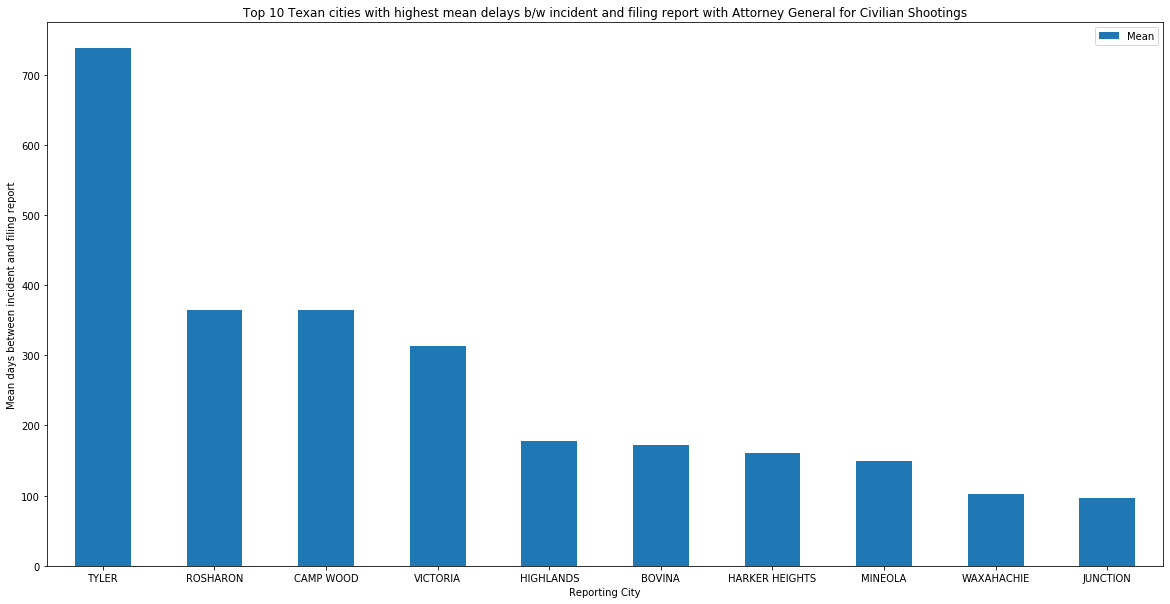

In [27]:
civ_county_df_asc_1 = civ_county_df_asc[0:10]
ax = civ_county_df_asc_1.plot.bar(x='City', y='Mean', rot=0)
ax.set_title('Top 10 Texan cities with highest mean delays b/w incident and filing report with Attorney General for Civilian Shootings')
ax.set_xlabel('Reporting City')
ax.set_ylabel('Mean days between incident and filing report')
plt.rcParams["figure.figsize"] = (20,10)

However, mean days between incident reporting might not be the best metric, there could be one late report file that skews the average. Thus, next I decided to look at the number of tardy reporitng of incidents vs. total incidents for each county. 

The following code goes through list of unique counties, indexes the tally list of incidents by the unique county, then figures how many of the inidents of the total number of incidents are reported after 30 days.

In [28]:
mean_civ_count_list = []
over_civ_count_list = []
for n in range(len(civ_city_list)-1):
    this_city = civ_city_list[n]
    this_city_data = civ_shot_notnan.loc[civ_shot_notnan['incident_city'] == this_city]
    this_city_total = len(this_city_data) #total incidents
    
    this_city_date_mean = np.mean(this_city_data['date_count'])
    mean_civ_count_list.append({'City': this_city, 'Mean': this_city_date_mean})
    mean_civ_count_df = pd.DataFrame(mean_civ_count_list)
    
    tally_over_30 = []
    for t in range(this_city_total):
        this_city_count = this_city_data.iloc[t-1].date_count
        
        if this_city_count > 30:
            tally_over_30.append(1)
        else:
            tally_over_30.append(0) 
    
    total_over_30 = np.sum(tally_over_30)
    prop_over_30 = np.mean(tally_over_30)
    over_civ_count_list.append({'City': this_city, 'Total_Over30': total_over_30, 'Total': this_city_total, 'Prop_Over30': prop_over_30})    
    over_civ_count_df = pd.DataFrame(over_civ_count_list)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
pd.set_option('display.max_rows', 200)
over_civ_count_df

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,10.0,76,0.131579
1,BEAUMONT,1.0,5,0.200000
2,VICTORIA,1.0,1,1.000000
3,DALLAS,1.0,25,0.040000
4,ODESSA,3.0,9,0.333333
5,HIGHLANDS,1.0,1,1.000000
6,HARKER HEIGHTS,1.0,1,1.000000
7,SPRING,2.0,6,0.333333
8,MINEOLA,1.0,1,1.000000
9,SAN ANTONIO,9.0,55,0.163636


In [30]:
#### Sorting overall number of days > 30 between incident and report by county in ascending order

In [31]:
over_civ_count_df_asc = over_civ_count_df.sort_values(by='Total_Over30', ascending=False)
over_civ_count_df_asc = over_civ_count_df_asc.reset_index(drop=True)
over_civ_count_df_asc

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,10.0,76,0.131579
1,SAN ANTONIO,9.0,55,0.163636
2,LAREDO,6.0,11,0.545455
3,ODESSA,3.0,9,0.333333
4,FORT WORTH,3.0,22,0.136364
5,ARLINGTON,2.0,11,0.181818
6,AUSTIN,2.0,24,0.083333
7,DENTON,2.0,2,1.000000
8,SPRING,2.0,6,0.333333
9,SCHERTZ,2.0,2,1.000000


In [32]:
#### getting the top ten counties with overall number of days > 30 between incident 

In [33]:
over_civ_count_df_asc_list = over_civ_count_df_asc[0:10]
over_civ_count_df_asc_list

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,10.0,76,0.131579
1,SAN ANTONIO,9.0,55,0.163636
2,LAREDO,6.0,11,0.545455
3,ODESSA,3.0,9,0.333333
4,FORT WORTH,3.0,22,0.136364
5,ARLINGTON,2.0,11,0.181818
6,AUSTIN,2.0,24,0.083333
7,DENTON,2.0,2,1.000000
8,SPRING,2.0,6,0.333333
9,SCHERTZ,2.0,2,1.000000


## Total number of reports made vs. number of reports after 30-days for civilian incidents

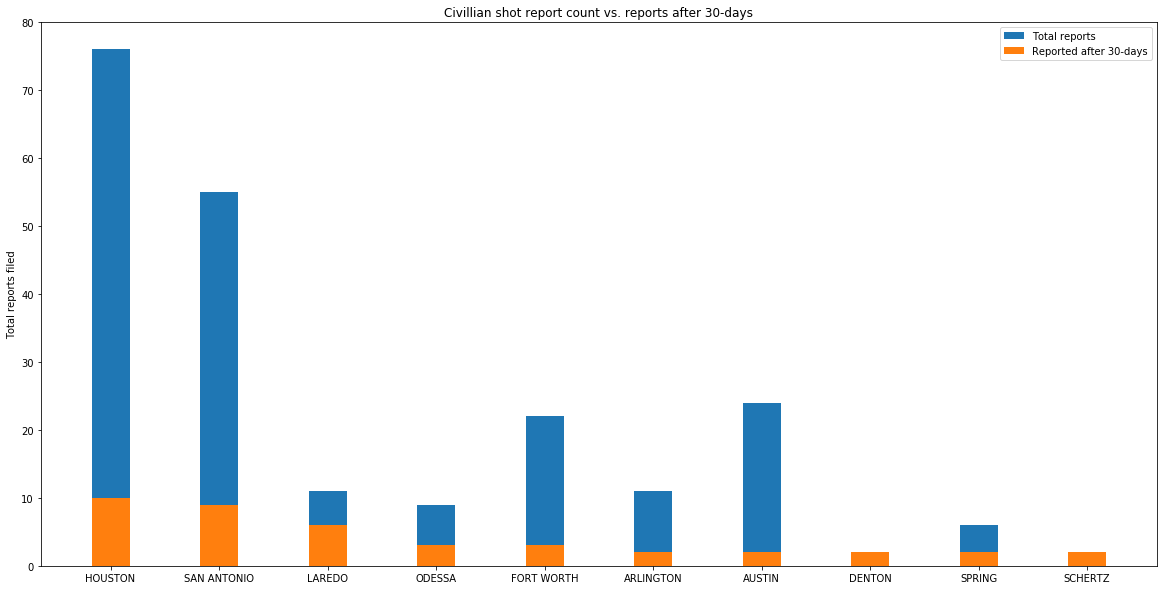

In [34]:
N = len(over_civ_count_df_asc_list)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over_civ_count_df_asc_list['Total'], width)
p2 = plt.bar(ind, over_civ_count_df_asc_list['Total_Over30'], width, bottom=0)

plt.ylabel('Total reports filed')
plt.title('Civillian shot report count vs. reports after 30-days')
plt.xticks(ind, (over_civ_count_df_asc_list['City']))
plt.yticks(np.arange(0, np.max(over_civ_count_df_asc_list.Total)+10, 10))
plt.legend((p1[0], p2[0]), ('Total reports', 'Reported after 30-days'))

plt.show()

# ==============================================================
# Dates between incident and report for officers shot 
# ==============================================================

We created another function to calculate days between officer incidents because the formatting of the data is different and features the time of incident as well as date. So we can use datatime.strptime for stripping extraneous variable. 

In [35]:
def off_days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

#### Looping through data to figure out the days between reporting of each incident:

In [36]:
off_date_count = []
for n in range(len(off_shot_notnan)):
    this_off_shot_date = off_shot_notnan['date_incident'][n]
    this_off_file_date = off_shot_notnan['date_ag_received'][n]
    days = off_days_between(this_off_file_date, this_off_shot_date)
    off_date_count.append(days)
    
off_shot_notnan.insert(2, "date_count", off_date_count, True)     
off_shot_notnan

,date_ag_received,date_incident,date_count,incident_address,incident_city,incident_county,incident_zip,officer_harm,officer_name_first,officer_name_last,...,civilian_race_2,civilian_gender_2,civilian_name_first_3,civilian_name_last_3,civilian_age_3,civilian_race_3,civilian_gender_3,media_link_1,media_link_2,media_link_3
0,2017-02-21 00:00:00,2015-11-01 00:00:00,478,301 W. AVENUE B,TEMPLE,BELL,76501,DEATH,DARRELL,ALLEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WACO TRIBUNE-HERALD,NaN,NaN
1,2017-02-14 00:00:00,2016-03-01 00:00:00,350,508 SIMMONS DR.,EULESS,TARRANT,76040,DEATH,DAVID STEFAN,HOFER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DALLAS MORNING NEWS,NBC DFW,NaN
2,2016-07-20 00:00:00,2016-07-07 00:00:00,13,801 MAIN ST.,DALLAS,DALLAS,75215,DEATH,LORNE,AHRENS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
3,2016-07-20 00:00:00,2016-07-07 00:00:00,13,801 MAIN ST.,DALLAS,DALLAS,75215,DEATH,MICHAEL,KROL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
4,2016-07-20 00:00:00,2016-07-07 00:00:00,13,801 MAIN ST.,DALLAS,DALLAS,75215,DEATH,MICHAEL,SMITH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
5,2016-07-20 00:00:00,2016-07-07 00:00:00,13,801 MAIN ST.,DALLAS,DALLAS,75215,DEATH,PATRICK,ZAMARRIPA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
6,2017-01-19 00:00:00,2016-07-07 00:00:00,196,800 ELM ST. @ 200 N. LAMAR,DALLAS,DALLAS,75202,INJURY,ELMAR,CANNON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
7,2017-01-19 00:00:00,2016-07-07 00:00:00,196,800 ELM ST. @ 200 N. LAMAR,DALLAS,DALLAS,75202,INJURY,JESUS,RENTANA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
8,2017-01-19 00:00:00,2016-07-07 00:00:00,196,800 ELM ST. @ 200 N. LAMAR,DALLAS,DALLAS,75202,INJURY,MISTY,MCBRIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN
9,2017-01-19 00:00:00,2016-07-07 00:00:00,196,800 ELM ST. @ 200 N. LAMAR,DALLAS,DALLAS,75202,DEATH,BRENT ALAN,THOMPSON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBC DFW,WFAA,NaN


#### Get a list of the unique counties in the dataset, so that we can count the incidents filed by county:

In [37]:
off_city_list = list(off_shot_notnan['incident_city'].unique())

#### Looping through data to figure out the mean days between reporting of each incident + proportion > 30 days by county:

In [38]:
mean_count_list = []
over_count_list = []
for n in range(len(off_city_list)-1):
    this_city = off_city_list[n]
    this_city_data = off_shot_notnan.loc[off_shot_notnan['incident_city'] == this_city]
    this_city_total = len(this_city_data) #total incidents
    
    this_city_date_mean = np.mean(this_city_data['date_count'])
    mean_count_list.append({'City': this_city, 'Mean': this_city_date_mean})
    mean_count_df = pd.DataFrame(mean_count_list)
    
    tally_over_30 = []
    for t in range(this_city_total):
        this_city_count = this_city_data.iloc[t-1].date_count
        
        if this_city_count > 30:
            tally_over_30.append(1)
        else:
            tally_over_30.append(0) 
    
    total_over_30 = np.sum(tally_over_30)
    prop_over_30 = np.mean(tally_over_30)
    over_count_list.append({'City': this_city, 'Total_Over30': total_over_30, 'Total': this_city_total, 'Prop_Over30': prop_over_30})    
    over_off_count_df = pd.DataFrame(over_count_list)

#### Average number of days between incident and report by county in ascending order

In [39]:
mean_count_df_asc = mean_count_df.sort_values(by='Mean', ascending=False)
mean_count_df_asc = mean_count_df_asc.reset_index(drop=True)
mean_count_df_asc

,City,Mean
0,TEMPLE,478.000000
1,EULESS,350.000000
2,MIDLAND,314.000000
3,DENTON,126.000000
4,PALESTINE,123.000000
5,DALLAS,104.166667
6,SAN ANTONIO,89.454545
7,SANTA FE,54.000000
8,FORT WORTH,50.333333
9,SUGAR LAND,48.000000


## Mean days between incident and filing report for officers shot

Text(0, 0.5, 'Mean days between incident and filing report')

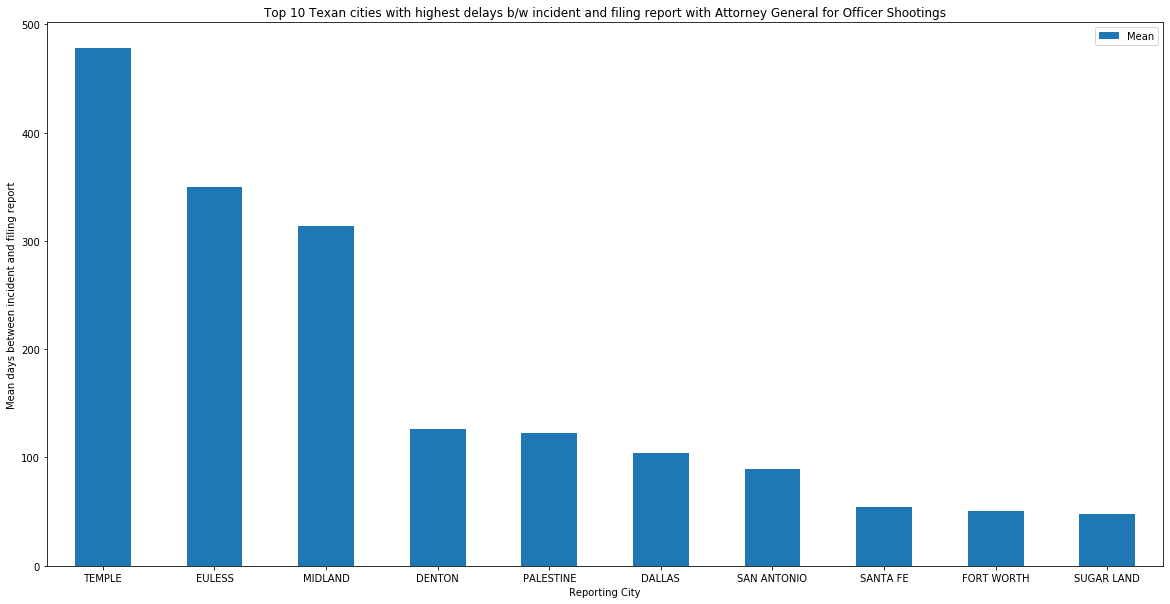

In [40]:
mean_count_df_asc = mean_count_df_asc[0:10]
ax = mean_count_df_asc.plot.bar(x='City', y='Mean', rot=0)
ax.set_title('Top 10 Texan cities with highest delays b/w incident and filing report with Attorney General for Officer Shootings')
ax.set_xlabel('Reporting City')
ax.set_ylabel('Mean days between incident and filing report')


#### Sorting overall number of days > 30 between incident and report by county in ascending order

In [41]:
#take the over_off_count_df and sort it ascendingly 
over_off_count_df_asc = over_off_count_df.sort_values(by='Total_Over30', ascending=False)
over_off_count_df_asc = over_off_count_df_asc.reset_index(drop=True)
over_off_count_df_asc

,City,Total_Over30,Total,Prop_Over30
0,DALLAS,9,18,0.500000
1,LAREDO,8,10,0.800000
2,SAN ANTONIO,3,11,0.272727
3,FORT WORTH,2,3,0.666667
4,TEMPLE,1,1,1.000000
5,ARLINGTON,1,3,0.333333
6,DENTON,1,1,1.000000
7,PALESTINE,1,1,1.000000
8,EL PASO,1,2,0.500000
9,MIDLAND,1,1,1.000000


In [42]:
over_off_count_df_asc_list = over_off_count_df_asc[0:10]
over_off_count_df_asc_list

,City,Total_Over30,Total,Prop_Over30
0,DALLAS,9,18,0.500000
1,LAREDO,8,10,0.800000
2,SAN ANTONIO,3,11,0.272727
3,FORT WORTH,2,3,0.666667
4,TEMPLE,1,1,1.000000
5,ARLINGTON,1,3,0.333333
6,DENTON,1,1,1.000000
7,PALESTINE,1,1,1.000000
8,EL PASO,1,2,0.500000
9,MIDLAND,1,1,1.000000


## Total number of reports made vs. number of reports after 30-days for officers shot

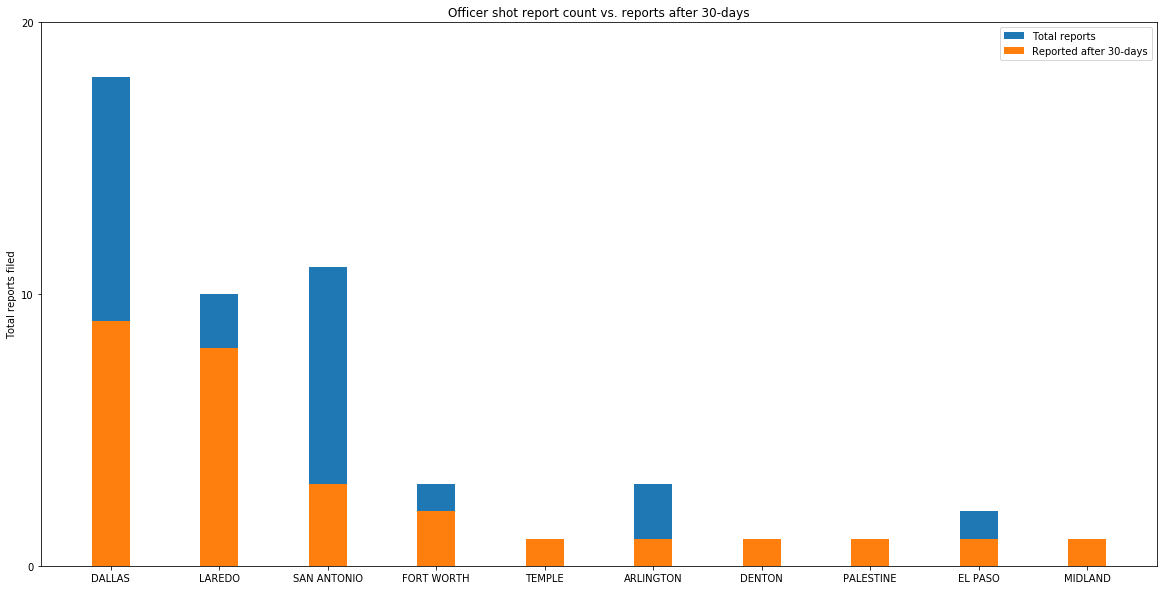

In [43]:
N = len(over_off_count_df_asc_list)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over_off_count_df_asc_list['Total'], width)
p2 = plt.bar(ind, over_off_count_df_asc_list['Total_Over30'], width, bottom=0)

plt.ylabel('Total reports filed')
plt.title('Officer shot report count vs. reports after 30-days')
plt.xticks(ind, (over_off_count_df_asc_list['City']))
plt.yticks(np.arange(0, np.max(over_off_count_df_asc_list.Total)+10, 10))
plt.legend((p1[0], p2[0]), ('Total reports', 'Reported after 30-days'))

plt.show()